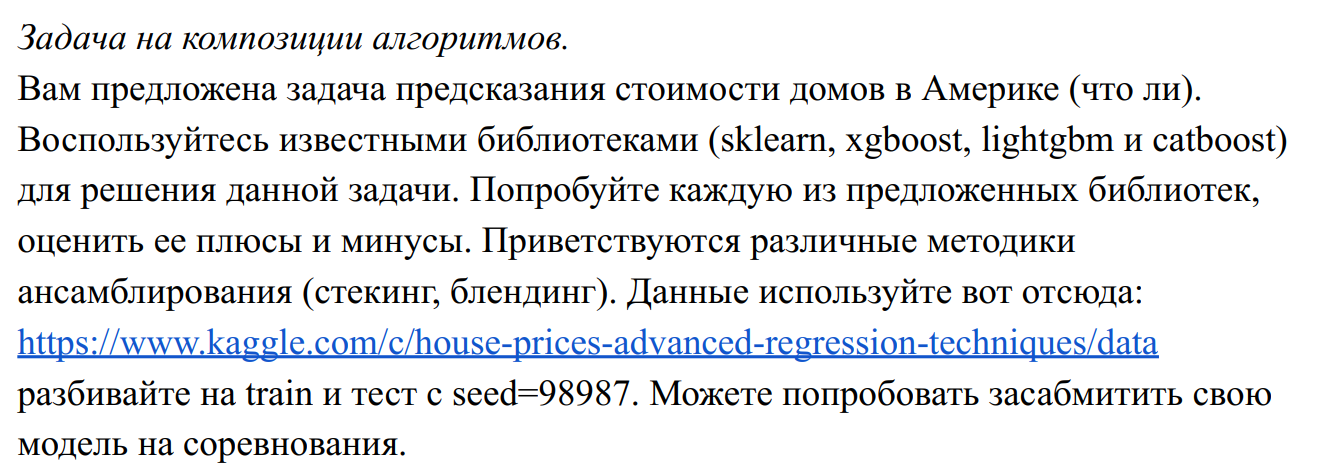

In [1]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.9 MB/s eta 0:00:00


In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
import xgboost as xgb
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor, Pool
from google.colab import drive
sns.set_style('darkgrid')


drive.mount('/content/drive')
pd.set_option('display.max_columns', None)
full_data = pd.read_csv("sample_data/train.csv")
full_data.head(n=15)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [79]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<ipython-input-80-45697f1a6383>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = full_data.corr()


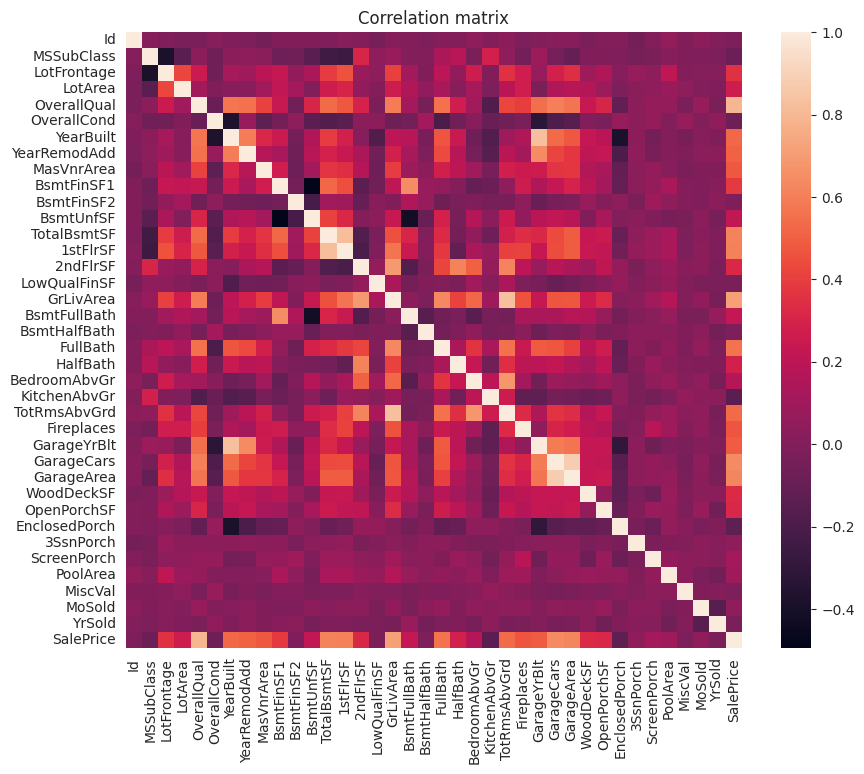

In [80]:
corrmat = full_data.corr()
f, ax = plt.subplots(figsize=(10, 8))
ax.set_title("Correlation matrix")
sns.heatmap(corrmat, vmax=1., square=True);

In [81]:
top_corr_features = corrmat['SalePrice'].sort_values(ascending=True).head(15)
print(top_corr_features)

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
Name: SalePrice, dtype: float64


In [82]:
print('{:>13} {:>10} {:>10} {:>14}'.format("Column", "Not nan", "null", "%\n"))
for column in full_data.columns:
    print('{:>13} {:>10} {:>10} {:>14}'.format(column,
                                               full_data[column].isna().sum(),
                                               full_data[column].count(),
                                           '{:.5f}'.format(full_data[column].isna().sum() * 100 / len(full_data))))

       Column    Not nan       null             %

           Id          0       1460        0.00000
   MSSubClass          0       1460        0.00000
     MSZoning          0       1460        0.00000
  LotFrontage        259       1201       17.73973
      LotArea          0       1460        0.00000
       Street          0       1460        0.00000
        Alley       1369         91       93.76712
     LotShape          0       1460        0.00000
  LandContour          0       1460        0.00000
    Utilities          0       1460        0.00000
    LotConfig          0       1460        0.00000
    LandSlope          0       1460        0.00000
 Neighborhood          0       1460        0.00000
   Condition1          0       1460        0.00000
   Condition2          0       1460        0.00000
     BldgType          0       1460        0.00000
   HouseStyle          0       1460        0.00000
  OverallQual          0       1460        0.00000
  OverallCond          0       

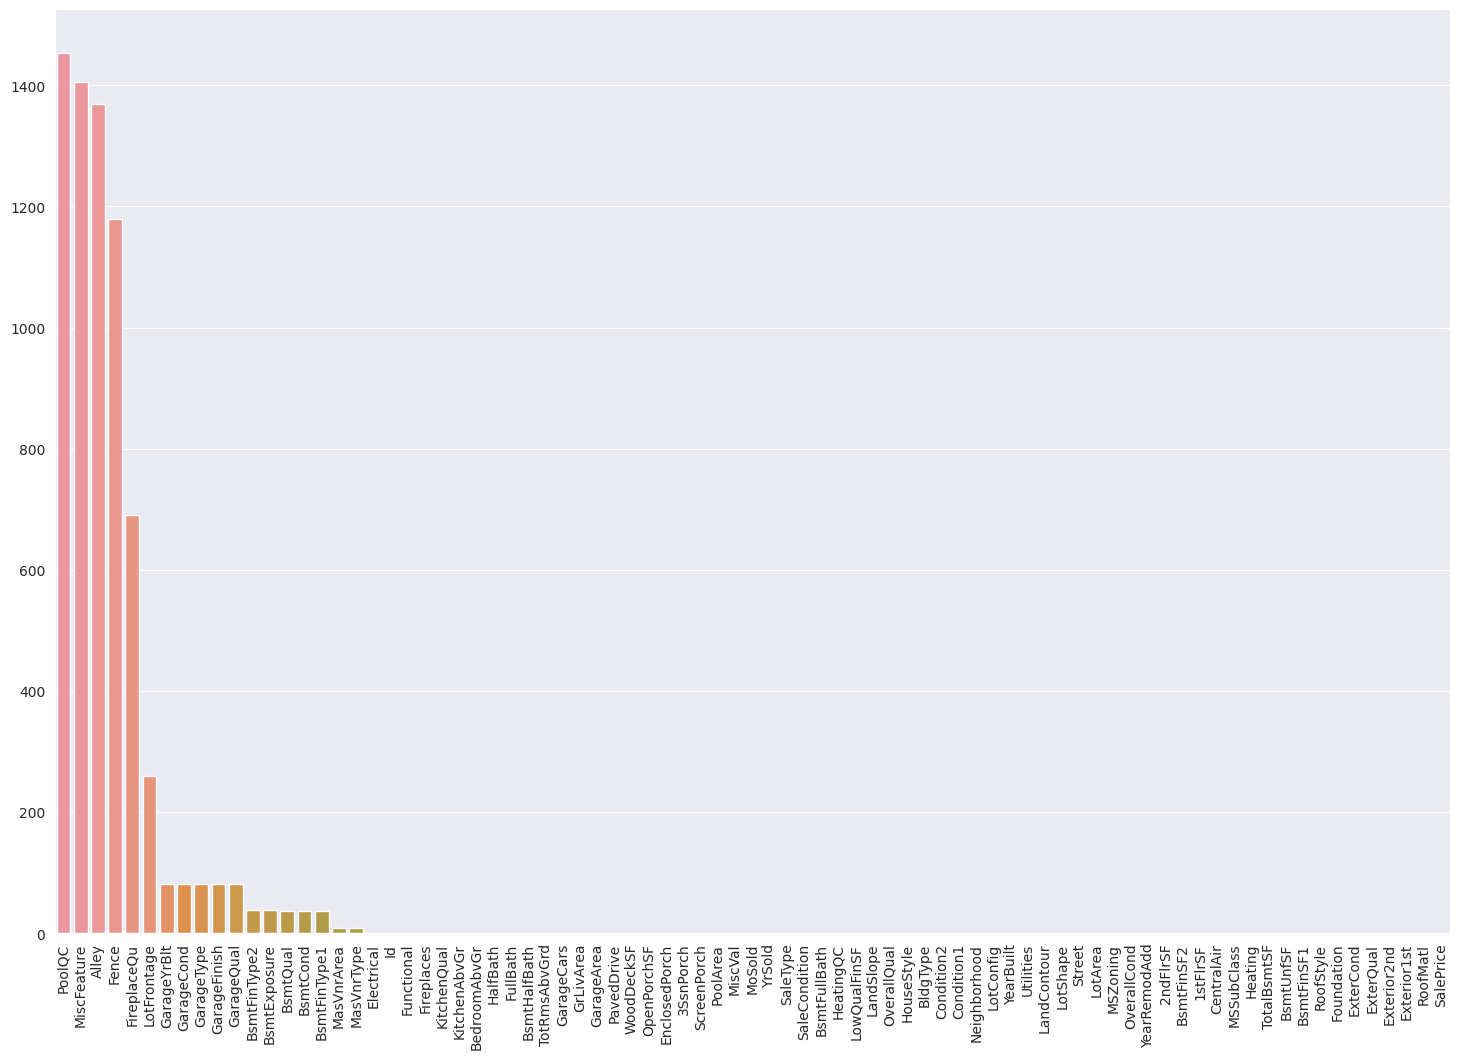

In [83]:
null_columns = full_data.isnull().sum().sort_values(ascending=False)

plt.figure(figsize=(18,12))
sns.barplot(x=null_columns.index,y=null_columns)
plt.xticks(rotation=90)
plt.show()

In [84]:
null_columns.head(n=20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [85]:
columns_to_drop = ['PoolQC', 'PoolArea', 'MiscFeature', 'MiscVal', 'GarageYrBlt', 'MoSold', 'YrSold']
full_data = full_data.drop(columns=columns_to_drop)

In [86]:
full_data.head(n=10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,NaN,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,NaN,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,NaN,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,NaN,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,NaN,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,Unf,2,480,TA,TA,Y,40,30,0,320,0,MnPrv,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,RFn,2,636,TA,TA,Y,255,57,0,0,0,NaN,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,RFn,2,484,TA,TA,Y,235,204,228,0,0,NaN,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,Unf,2,468,Fa,TA,Y,90,0,205,0,0,NaN,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,RFn,1,205,Gd,TA,Y,0,4,0,0,0,NaN,WD,Normal,118000


In [87]:
X = full_data.drop(['SalePrice', 'Id'],axis=1)
y_orig = full_data['SalePrice'].to_numpy()
y = np.log1p(y_orig)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=98987)

## Обработаем численные данные

In [89]:
numerical_columns = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]
numerical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

## Обработаем категориальные данные

In [90]:
categorical_columns = X_train.select_dtypes(include='object').columns
categorical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=None)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [91]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_preprocessor, numerical_columns),
        ('cat', categorical_preprocessor, categorical_columns)
    ])

In [92]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

## RandomForestRegressor

In [19]:
parameters = {
    'criterion': ('squared_error', ),
    'max_depth': [15, 30],
    'max_features': [None],
    'min_samples_leaf': [1, 5],
    'min_samples_split':[1, 5],
    'n_estimators': (1200, ),
    'oob_score': [True]
}

rforest = RandomForestRegressor()
rforest_gs = GridSearchCV(rforest, parameters, verbose=2)
rforest_gs.fit(X_train_transformed, y_train);

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END criterion=squared_error, max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=1, n_estimators=1200, oob_score=True; total time=   0.0s
[CV] END criterion=squared_error, max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=1, n_estimators=1200, oob_score=True; total time=   0.0s
[CV] END criterion=squared_error, max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=1, n_estimators=1200, oob_score=True; total time=   0.0s
[CV] END criterion=squared_error, max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=1, n_estimators=1200, oob_score=True; total time=   0.0s
[CV] END criterion=squared_error, max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=1, n_estimators=1200, oob_score=True; total time=   0.0s
[CV] END criterion=squared_error, max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=1200, oob

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

In [23]:
pred = rforest_gs.predict(X_test_transformed)
rf_best_params = rforest_gs.best_params_
rmse = np.sqrt(mean_squared_error(y_test, pred))
print(f'RMSE: {rmse}')
print(rf_best_params)

RMSE: 0.1571927143982375
{'criterion': 'squared_error', 'max_depth': 30, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1200, 'oob_score': True}


## xgboost

In [42]:
parameters = {
    "learning_rate": [0.1, 0.05],
    "max_depth": [3, 5],
    "colsample_bytree": [0.45],
    "min_child_weight": [1, 1.5, 1.75],
    "gamma":[ 0.0, 0.045, 0.06],
    "n_estimators": [2170],
    "reg_alpha": [0.45],
    "reg_lambda": [0.85]
}

xgb_model = xgb.XGBRegressor()
xgb_gs = GridSearchCV(xgb_model, parameters, verbose=2)
xgb_gs.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END colsample_bytree=0.45, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=2170, reg_alpha=0.45, reg_lambda=0.85; total time=   4.8s
[CV] END colsample_bytree=0.45, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=2170, reg_alpha=0.45, reg_lambda=0.85; total time=   0.8s
[CV] END colsample_bytree=0.45, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=2170, reg_alpha=0.45, reg_lambda=0.85; total time=   0.8s
[CV] END colsample_bytree=0.45, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=2170, reg_alpha=0.45, reg_lambda=0.85; total time=   0.8s
[CV] END colsample_bytree=0.45, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=2170, reg_alpha=0.45, reg_lambda=0.85; total time=   0.8s
[CV] END colsample_bytree=0.45, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimator

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.45],
                         'gamma': [0.0, 0.045, 0.06],
                         'learning_rate': [0.1, 0.05], 'max_depth': [3, 5],
                         'min_child_weight': [1, 1.5, 1.75],
                         'n_estimators': [2170], 'reg_alpha': [0.45],
                         'reg_lambda': [0.85]},
             verbose=2)

In [45]:
pred = xgb_gs.predict(X_test_transformed)
rmse = np.sqrt(mean_squared_error(y_test, pred))
xgb_best_params = xgb_gs.best_params_
print(f'RMSE: {rmse}')
print(xgb_best_params)

RMSE: 0.14361333837762802
{'colsample_bytree': 0.45, 'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 2170, 'reg_alpha': 0.45, 'reg_lambda': 0.85}


## lightgbm

In [46]:
parameters = {
    'objective': ['regression'],
    'learning_rate': [0.1, 0.01],
    'num_leaves': [4, 6],
    'n_estimators': [5000, 6750],
    'max_bin': [100, 200],
    'bagging_fraction': [0.5, 0.75],
    'bagging_freq': [4],
    'feature_fraction': [0.25]
}

lgbm_model = lgb.LGBMRegressor(verbose=-1)
lgbmr_gs = GridSearchCV(lgbm_model, parameters, verbose=2)
lgbmr_gs.fit(X_train_transformed, y_train);

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END bagging_fraction=0.5, bagging_freq=4, feature_fraction=0.25, learning_rate=0.1, max_bin=100, n_estimators=5000, num_leaves=4, objective=regression; total time=   2.6s
[CV] END bagging_fraction=0.5, bagging_freq=4, feature_fraction=0.25, learning_rate=0.1, max_bin=100, n_estimators=5000, num_leaves=4, objective=regression; total time=   2.5s
[CV] END bagging_fraction=0.5, bagging_freq=4, feature_fraction=0.25, learning_rate=0.1, max_bin=100, n_estimators=5000, num_leaves=4, objective=regression; total time=   1.7s
[CV] END bagging_fraction=0.5, bagging_freq=4, feature_fraction=0.25, learning_rate=0.1, max_bin=100, n_estimators=5000, num_leaves=4, objective=regression; total time=   1.7s
[CV] END bagging_fraction=0.5, bagging_freq=4, feature_fraction=0.25, learning_rate=0.1, max_bin=100, n_estimators=5000, num_leaves=4, objective=regression; total time=   1.7s
[CV] END bagging_fraction=0.5, bagging_freq=4, feature_fra

In [47]:
pred = lgbmr_gs.predict(X_test_transformed)
rmse = np.sqrt(mean_squared_error(y_test, pred))
lgbm_best_params = lgbmr_gs.best_params_
print(f'RMSE: {rmse}')
print(lgbmr_gs.best_params_)

RMSE: 0.14125348554227962
{'bagging_fraction': 0.75, 'bagging_freq': 4, 'feature_fraction': 0.25, 'learning_rate': 0.01, 'max_bin': 100, 'n_estimators': 5000, 'num_leaves': 4, 'objective': 'regression'}


## catboost

In [116]:
full_data = pd.read_csv("sample_data/train.csv")
columns_to_drop = ['Id']
full_data.drop(columns=columns_to_drop, inplace=True)

X = full_data.drop(columns=['SalePrice'])
y = np.log1p(full_data['SalePrice'])

categorical_columns = X.select_dtypes(include=["object"]).columns
X[categorical_columns] = X[categorical_columns].fillna('None')

In [117]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.12)
train_pool = Pool(x_train, y_train, cat_features=categorical_columns.tolist())
test_pool = Pool(x_test, y_test, cat_features=categorical_columns.tolist())

In [118]:
parameters = {
            'learning_rate': [0.01],
            'iterations': [2000],
            'depth': [6],
            'l2_leaf_reg': [1],
            'border_count': [255],
            'min_data_in_leaf': [1],
            'max_leaves': [64]
            } #best params


catboost_model = CatBoostRegressor(loss_function='RMSE', verbose=0)
catboost_gs = catboost_model.grid_search(parameters, train_pool, shuffle=False, verbose=2, search_by_train_test_split=False)

Training on fold [0/3]

bestTest = 0.1578791393
bestIteration = 1999

Training on fold [1/3]

bestTest = 0.1931188243
bestIteration = 1998

Training on fold [2/3]

bestTest = 0.1857316093
bestIteration = 1991

0:	loss: 0.1789153	best: 0.1789153 (0)	total: 2m 54s	remaining: 0us


In [119]:
pred = catboost_model.predict(test_pool)
rmse = np.sqrt(mean_squared_error(y_test, pred))
print(f'RMSE: {rmse}')

RMSE: 0.1044669602686144


## Stacking

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from mlxtend.regressor import StackingCVRegressor

base_models = [RandomForestRegressor(n_estimators=500, random_state=1, max_features=24, criterion='squared_error', min_samples_leaf=1),
               RandomForestRegressor(n_estimators=700, random_state=1, max_features=24, criterion='squared_error', min_samples_leaf=2),
               RandomForestRegressor(n_estimators=1000, random_state=1, max_features=24, criterion='squared_error', min_samples_leaf=8)]

meta_model = LinearRegression()
stacking_regressor = StackingCVRegressor(regressors=base_models,
                                         meta_regressor=meta_model,
                                         cv=5,
                                         shuffle=True,
                                         random_state=1)
stacking_regressor.fit(X_train_transformed, y_train)

StackingCVRegressor(meta_regressor=LinearRegression(), random_state=1,
                    regressors=[RandomForestRegressor(max_features=24,
                                                      min_samples_leaf=2,
                                                      n_estimators=500,
                                                      random_state=1),
                                RandomForestRegressor(max_features=24,
                                                      min_samples_leaf=5,
                                                      n_estimators=700,
                                                      random_state=1),
                                RandomForestRegressor(max_features=24,
                                                      min_samples_leaf=7,
                                                      n_estimators=1000,
                                                      random_state=1)])

In [ ]:
pred = stacking_regressor.predict(X_test_transformed)
rmse_stacking = np.sqrt(mean_squared_error(y_test, pred))
print(f"RMSE test: {rmse_stacking}")

RMSE training: 0.1551703146570414
